<a href="https://colab.research.google.com/github/K-R-sindhu/spark-foundation-terrorism-dataset-analysis/blob/main/EDA_of_terrorism_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/content/terrorism dataset.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [8]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [9]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
data.shape

(60404, 18)

In [11]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           319
Region            0
City              0
latitude       3247
longitude      3248
Attacktype        0
kill           5908
Wound          7778
target1         423
summary       59084
Group             0
Targettype        0
Weapon            0
motive        59366
dtype: int64

In [12]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [13]:
data['Casualities'] = data['kill'] + data['Wound']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60404 entries, 0 to 60403
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         60404 non-null  int64  
 1   Month        60404 non-null  int64  
 2   day          60404 non-null  int64  
 3   Country      60404 non-null  object 
 4   State        60085 non-null  object 
 5   Region       60404 non-null  object 
 6   City         60404 non-null  object 
 7   latitude     57157 non-null  float64
 8   longitude    57156 non-null  float64
 9   Attacktype   60404 non-null  object 
 10  kill         60404 non-null  float64
 11  Wound        60404 non-null  float64
 12  target1      59981 non-null  object 
 13  summary      1320 non-null   object 
 14  Group        60404 non-null  object 
 15  Targettype   60404 non-null  object 
 16  Weapon       60404 non-null  object 
 17  motive       1038 non-null   object 
 18  Casualities  60404 non-null  float64
dtypes: f

In [15]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,60404.000000,60404.000000,60404.000000,57157.000000,5.715600e+04,60404.000000,60404.000000,60404.000000
mean,1985.743411,6.397937,15.362393,17.728457,-1.524033e+03,1.863039,1.651463,3.514502
std,5.931497,3.381121,8.805209,24.836673,3.605000e+05,9.168424,24.834720,27.183753
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1981.000000,3.000000,8.000000,4.667128,-7.629858e+01,0.000000,0.000000,0.000000
50%,1987.000000,6.000000,15.000000,14.622869,-5.956210e+00,0.000000,0.000000,0.000000
75%,1991.000000,9.000000,23.000000,38.395649,3.276754e+01,1.000000,0.000000,2.000000
max,1995.000000,12.000000,31.000000,64.837778,1.784419e+02,1180.000000,5500.000000,5513.000000


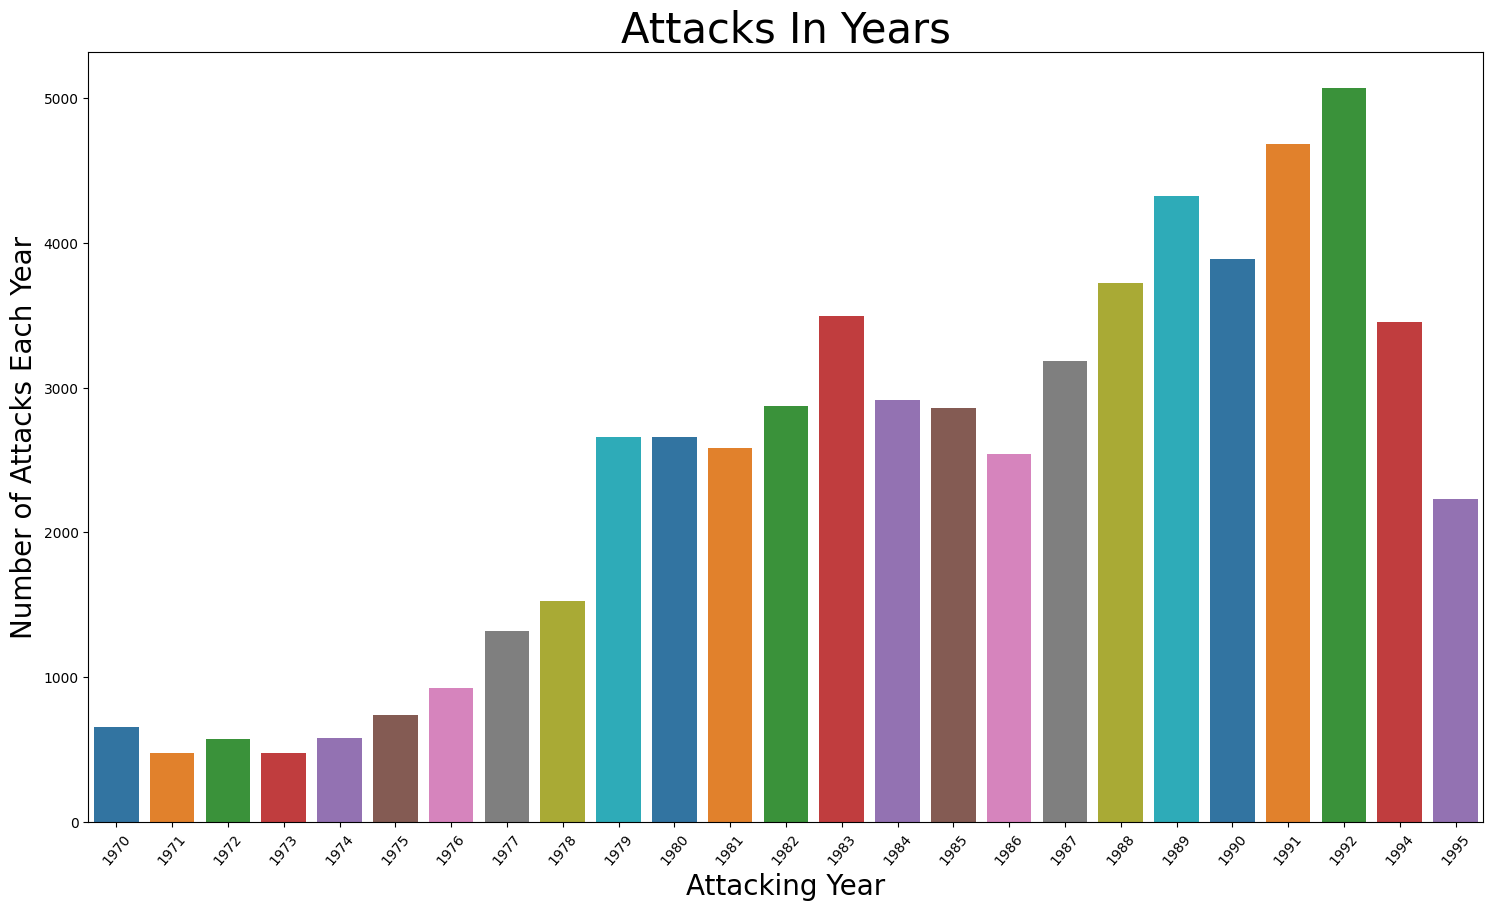

In [16]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

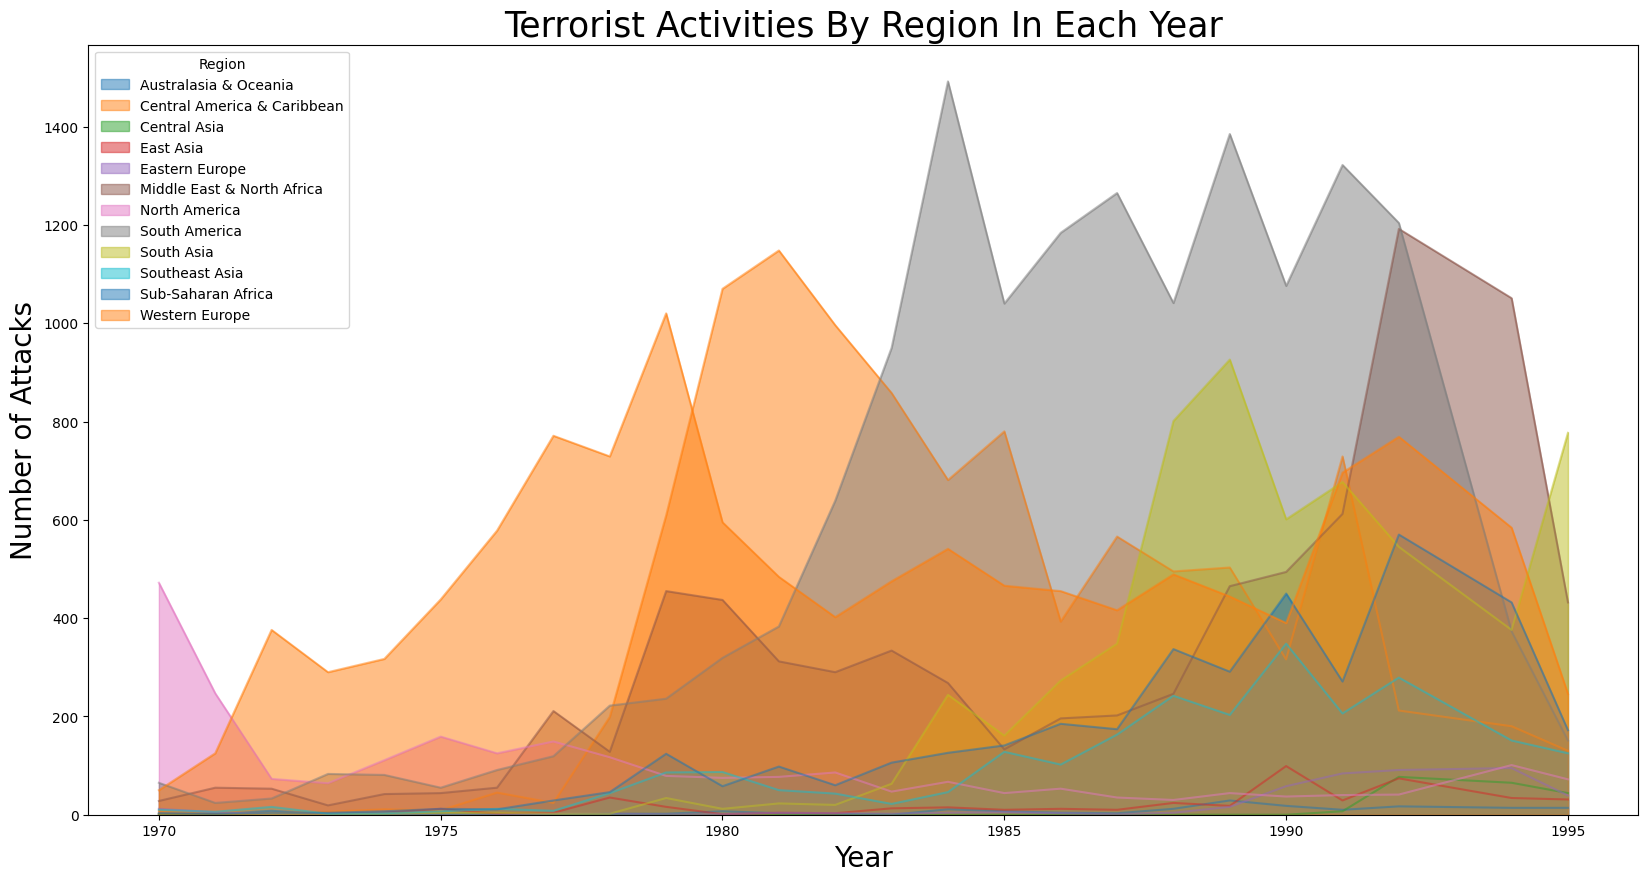

In [17]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [18]:
attack = data.Country.value_counts()[:10]
attack

Peru              5906
El Salvador       5310
Colombia          4937
United Kingdom    3913
Spain             2608
India             2438
Chile             2242
Turkey            2228
United States     2189
Guatemala         1963
Name: Country, dtype: int64

In [28]:
data.Group.value_counts()[1:10]

Shining Path (SL)                                   4436
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2607
Basque Fatherland and Freedom (ETA)                 1683
Palestinians                                        1094
Kurdistan Workers' Party (PKK)                       974
New People's Army (NPA)                              965
Revolutionary Armed Forces of Colombia (FARC)        919
Nicaraguan Democratic Force (FDN)                    895
Name: Group, dtype: int64

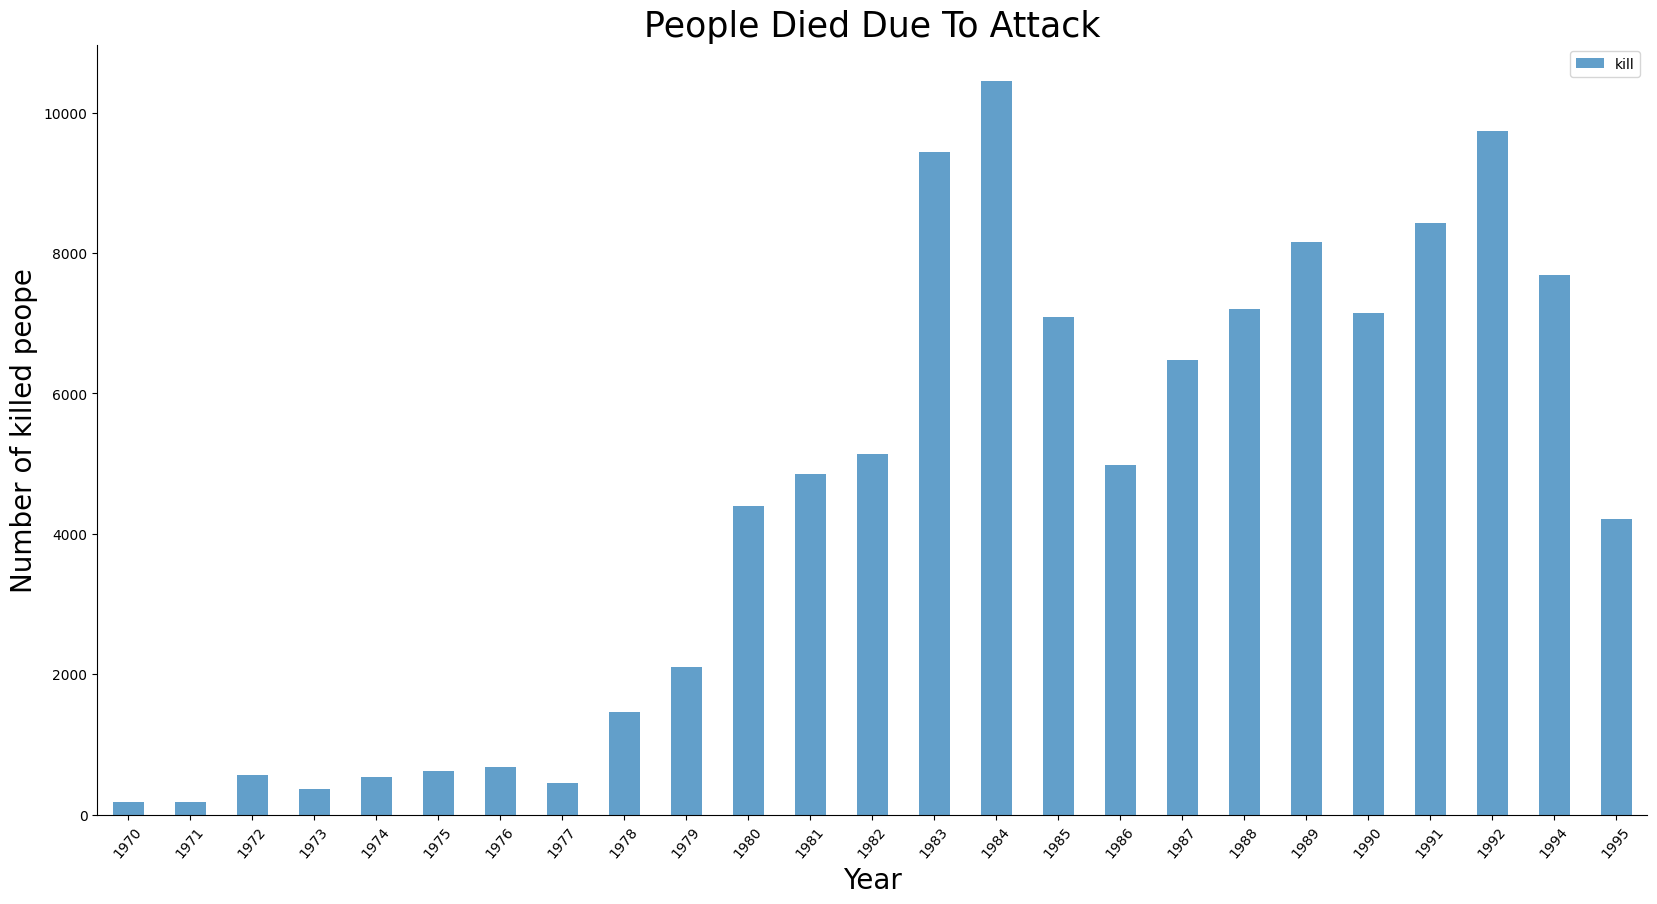

In [21]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

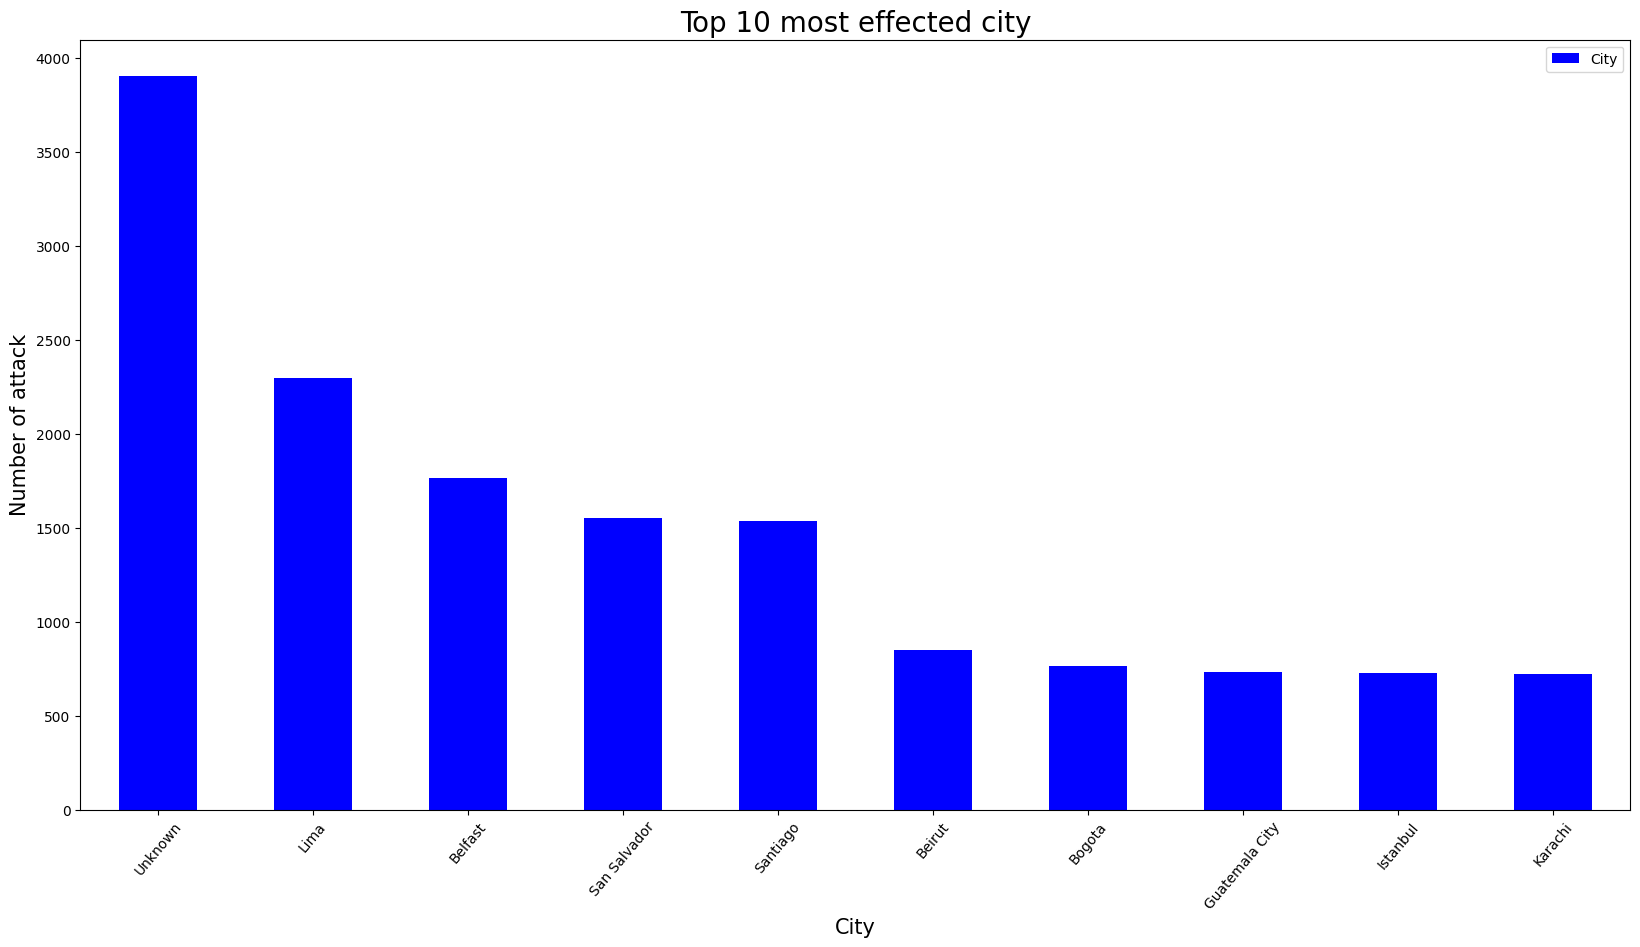

In [23]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

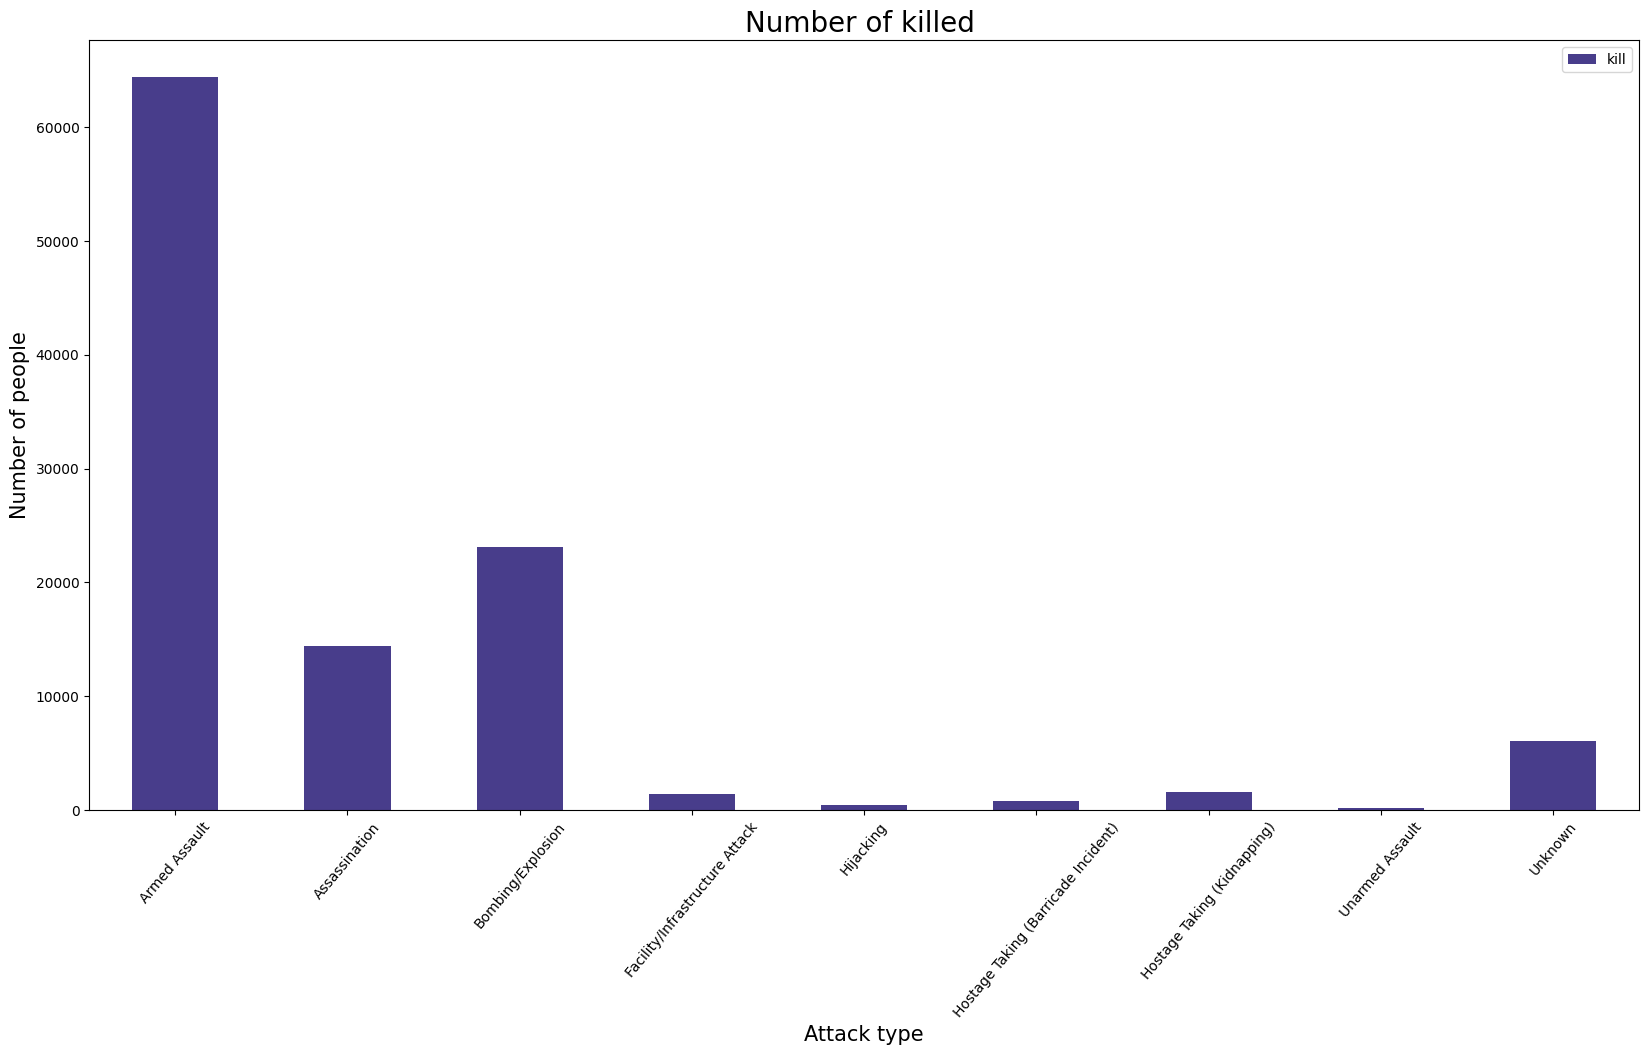

In [24]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

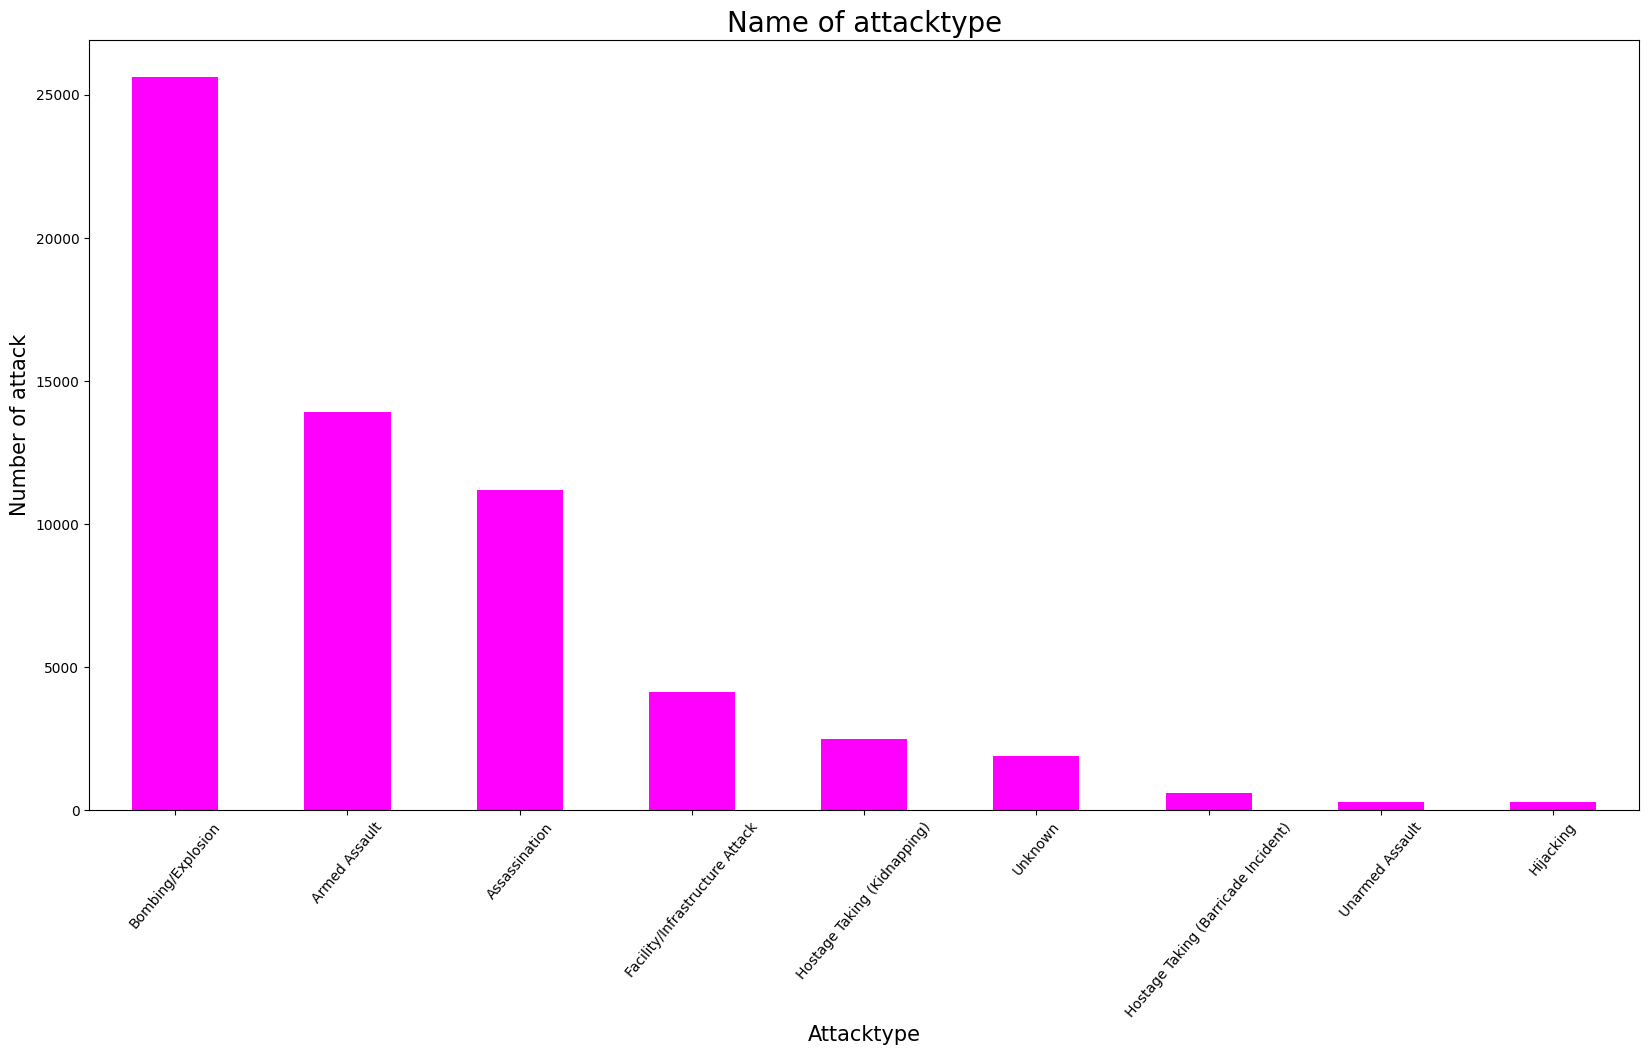

In [33]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

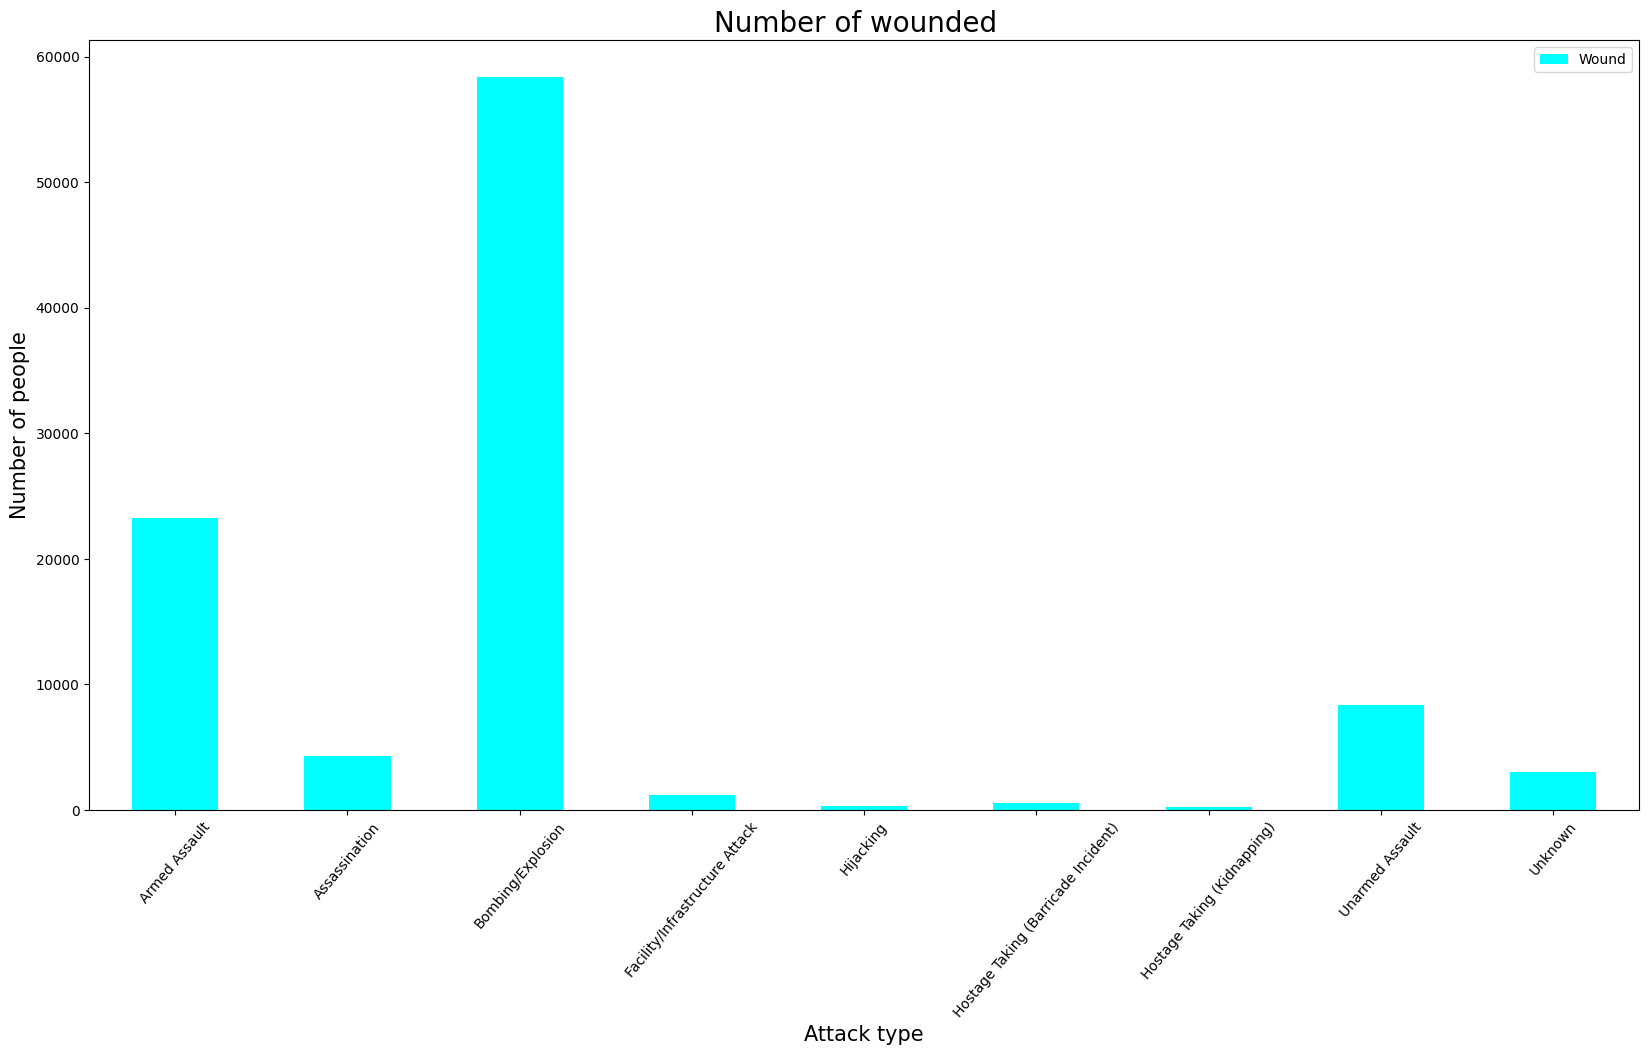

In [34]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

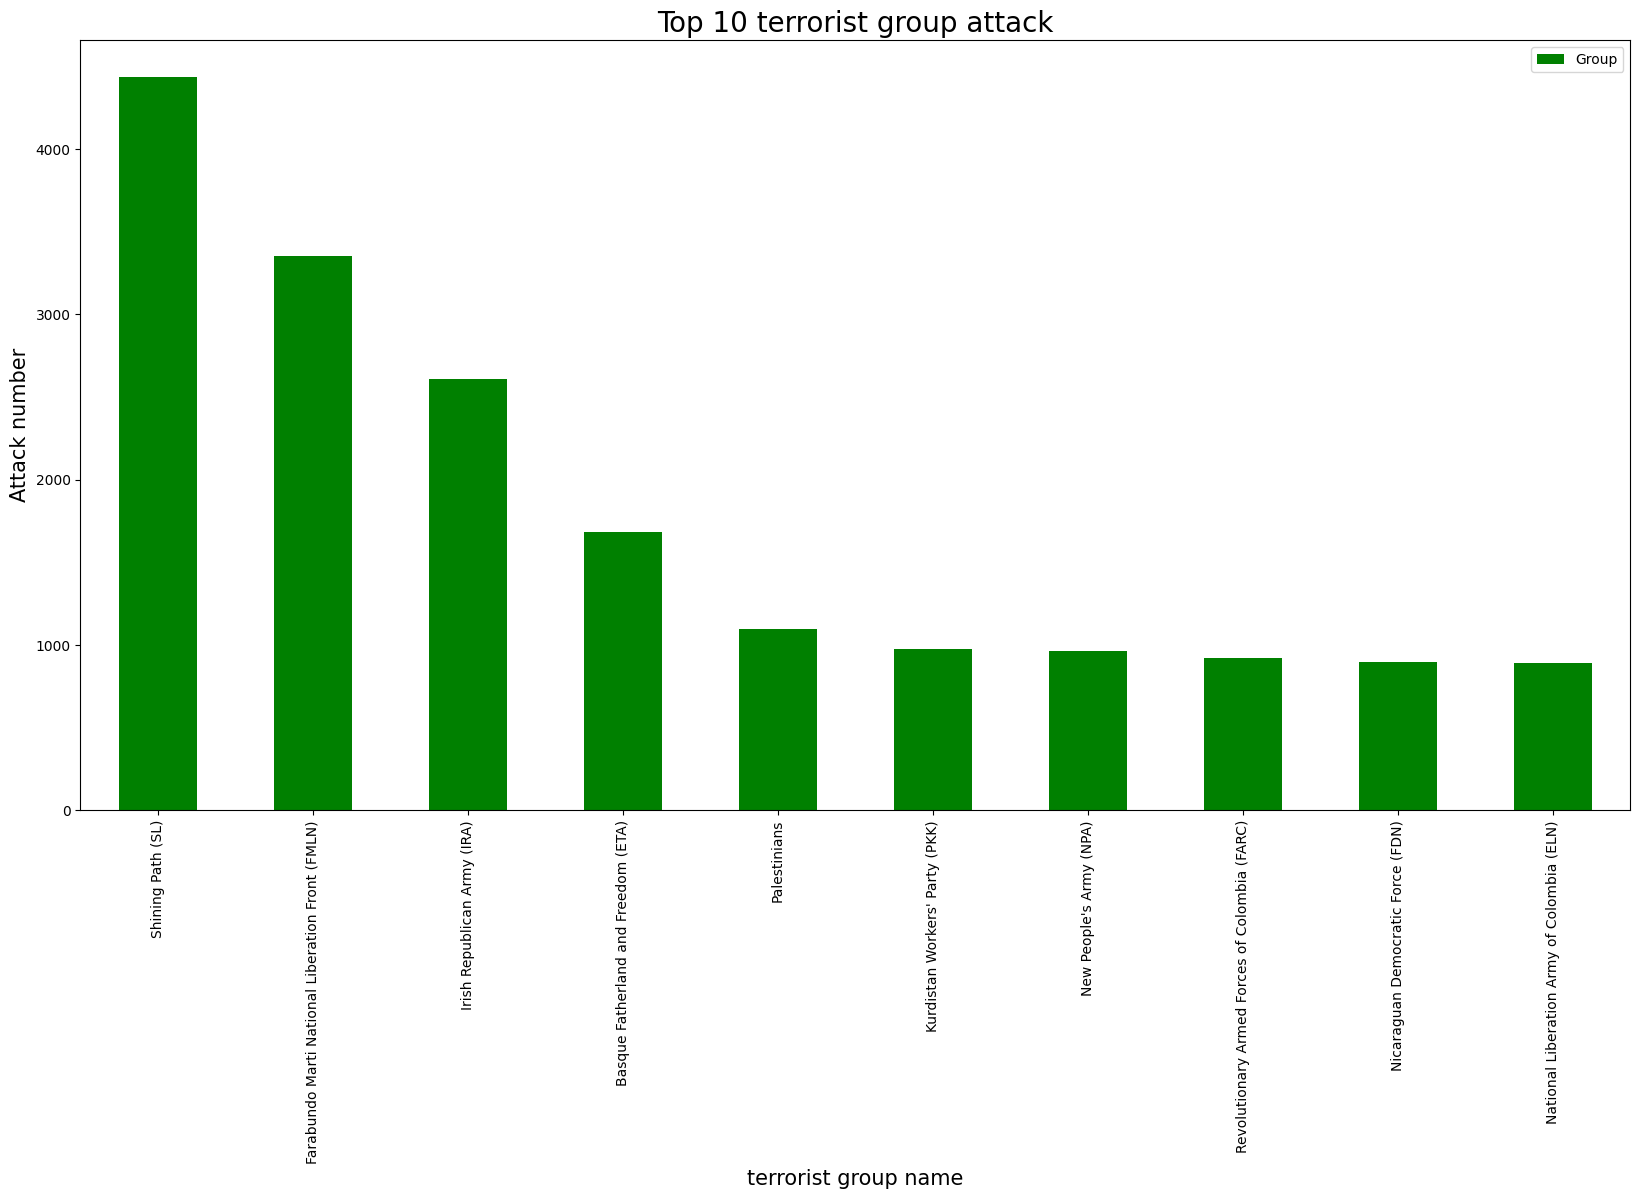

In [26]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [27]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Shining Path (SL),Peru,11348.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
2,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
3,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,6145.0
4,Kurdistan Workers' Party (PKK),Turkey,3091.0
5,New People's Army (NPA),Philippines,3002.0
6,Revolutionary Armed Forces of Colombia (FARC),Colombia,2712.0
7,Sikh Extremists,India,2476.0
8,Mozambique National Resistance Movement (MNR),Mozambique,2357.0
9,Democratic Revolutionary Alliance (ARDE),Nicaragua,1803.0


Conclusion and Results :

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks: Middle East & North Africa

Year with the most attacks: 2014

Month with the most attacks: 5

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion